In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [2]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [78]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 32, kernel_size = (3,3)
  X = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (2,2)
  X = MaxPooling2D(pool_size = (2,2))(X)

  # convolutional layer: filters = 64
  X = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(X)

  # convolutional layer: filters = 64, kernel_size = (3,3)
  X = Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu')(X)

  # max-pooling layer: pool_size = (2,2)
  X = MaxPooling2D(pool_size= (2,2) )(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 32, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # 2nd Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 128, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # max-pooling layer: pool_size = (2,2)
  X = MaxPooling2D(pool_size= (2,2))(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 32, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 128)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (2,2))(X)
  X1 = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(64, activation = 'relu')(X1)
  X1 = Dropout(0.5)(X1)
  X1 = Dense(1, activation = 'sigmoid', name="output1")(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 32, f2_conv3 = 64, f3_conv1 = 32, f3_conv5 = 128, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 32, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 128)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (2,2))(X)
  X2 = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(64, activation = 'relu')(X2)
  X2 = Dropout(0.25)(X2)
  X2 = Dense(1, activation = 'sigmoid', name="output2")(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 32, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, 
                      f3_conv5 = 64, f4 = 64)

  # max-pooling layer: pool_size = (2,2)
  X = MaxPooling2D(pool_size = (2,2))(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # 9th Inception block
  X = Inception_block(X, f1 = 32, f2_conv1 = 64, f2_conv3 = 128, f3_conv1 = 32, f3_conv5 = 64, f4 = 32)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.25)(X)

  # output layer 
  X = Dense(1, activation = 'sigmoid', name="output3")(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [79]:
model = GoogLeNet()

In [80]:
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_295 (Conv2D)             (None, 222, 222, 32) 896         input_6[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_65 (MaxPooling2D) (None, 111, 111, 32) 0           conv2d_295[0][0]                 
__________________________________________________________________________________________________
conv2d_296 (Conv2D)             (None, 109, 109, 64) 18496       max_pooling2d_65[0][0]           
__________________________________________________________________________________________

In [81]:
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import shutil
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
train_df = pd.read_csv('capstone covid data/train.txt', sep=" ", header=None)

In [83]:
train_df.columns=['patient id', 'filename', 'class', 'data source']

In [84]:
train_df=train_df.drop(['patient id', 'data source'], axis=1 )

In [85]:
train_df.head()

,filename,class
0,ARDSSevere.png,negative
1,acute-respiratory-distress-syndrome-ards-1.jpg,negative
2,acute-respiratory-distress-syndrome-ards.jpg,negative
3,ards-secondary-to-tiger-snake-bite.png,negative
4,pneumocystis-pneumonia-2-PA.png,negative


In [86]:
test_df = pd.read_csv('Capstone covid data/test.txt', sep=" ", header=None)
test_df.columns=['id', 'filename', 'class', 'data source' ]
test_df=test_df.drop(['id', 'data source'], axis=1 )

In [87]:
test_df.head()

,filename,class
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive


In [88]:
train_df['class'].value_counts()

negative    13793
positive     2158
Name: class, dtype: int64

In [89]:
negative  = train_df[train_df['class']=='negative']  
positive = train_df[train_df['class']=='positive'] 
from sklearn.utils import resample

df_majority_downsampled = resample(negative, replace = True, n_samples = 2158) 

train_df = pd.concat([positive, df_majority_downsampled])

from sklearn.utils import shuffle
train_df = shuffle(train_df) 

In [90]:
train_df['class'].value_counts()

positive    2158
negative    2158
Name: class, dtype: int64

In [91]:
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)

In [92]:
print(f"Negative and positive values of train: {train_df['class'].value_counts()}")
print(f"Negative and positive values of validation: {valid_df['class'].value_counts()}")
print(f"Negative and positive values of test: {test_df['class'].value_counts()}")

Negative and positive values of train: negative    1949
positive    1935
Name: class, dtype: int64
Negative and positive values of validation: positive    223
negative    209
Name: class, dtype: int64
Negative and positive values of test: positive    200
negative    200
Name: class, dtype: int64


In [93]:
train_path = 'Capstone covid data/train'  #directory path
test_path = 'Capstone covid data/test'

In [94]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [95]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, directory=train_path, x_col='filename', 
                                              y_col='class', target_size=(224,224), batch_size=64, 
                                               class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(dataframe = valid_df, directory=train_path, x_col='filename',
                                             y_col='class', target_size=(224,224), batch_size=64, 
                                            class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=test_path, x_col='filename', 
                                            y_col='class', target_size=(224,224), batch_size=64,
                                             class_mode='binary')


Found 3884 validated image filenames belonging to 2 classes.
Found 432 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [96]:
train_gen.class_indices

{'negative': 0, 'positive': 1}

In [98]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [99]:
history = model.fit(train_gen, 
                        epochs=22,
                        validation_data = valid_gen,
#                         steps_per_epoch=(len(train_gen.labels) / 80),
#                         validation_steps=(len(valid_gen.labels) / 80),
                       )

Epoch 1/22
61/61 [==============================] - 985s 16s/step - loss: 2.0857 - output3_loss: 0.6938 - output1_loss: 0.6972 - output2_loss: 0.6948 - output3_accuracy: 0.5028 - output1_accuracy: 0.4869 - output2_accuracy: 0.4930 - val_loss: 2.0794 - val_output3_loss: 0.6931 - val_output1_loss: 0.6931 - val_output2_loss: 0.6932 - val_output3_accuracy: 0.5162 - val_output1_accuracy: 0.5139 - val_output2_accuracy: 0.4838
Epoch 2/22
61/61 [==============================] - 1065s 17s/step - loss: 2.0711 - output3_loss: 0.6916 - output1_loss: 0.6862 - output2_loss: 0.6932 - output3_accuracy: 0.4892 - output1_accuracy: 0.5322 - output2_accuracy: 0.5015 - val_loss: 1.9855 - val_output3_loss: 0.6690 - val_output1_loss: 0.6404 - val_output2_loss: 0.6761 - val_output3_accuracy: 0.4838 - val_output1_accuracy: 0.7014 - val_output2_accuracy: 0.6759
Epoch 3/22
61/61 [==============================] - 1094s 18s/step - loss: 1.9098 - output3_loss: 0.6502 - output1_loss: 0.6164 - output2_loss: 0.6431 

61/61 [==============================] - 921s 15s/step - loss: 1.0288 - output3_loss: 0.3761 - output1_loss: 0.3131 - output2_loss: 0.3396 - output3_accuracy: 0.8401 - output1_accuracy: 0.8769 - output2_accuracy: 0.8594 - val_loss: 1.0393 - val_output3_loss: 0.3623 - val_output1_loss: 0.2988 - val_output2_loss: 0.3783 - val_output3_accuracy: 0.8426 - val_output1_accuracy: 0.8958 - val_output2_accuracy: 0.8426
Epoch 21/22
61/61 [==============================] - 929s 15s/step - loss: 0.9748 - output3_loss: 0.3610 - output1_loss: 0.2913 - output2_loss: 0.3224 - output3_accuracy: 0.8484 - output1_accuracy: 0.8792 - output2_accuracy: 0.8746 - val_loss: 0.8608 - val_output3_loss: 0.2791 - val_output1_loss: 0.3019 - val_output2_loss: 0.2797 - val_output3_accuracy: 0.8958 - val_output1_accuracy: 0.8843 - val_output2_accuracy: 0.9051
Epoch 22/22
61/61 [==============================] - 912s 15s/step - loss: 0.9126 - output3_loss: 0.3274 - output1_loss: 0.2801 - output2_loss: 0.3052 - output3_a

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image 

In [168]:
img_path="Capstone covid data/train/COVID(605).png"
i = image.load_img(img_path, target_size=(224,224))
i = image.img_to_array(i)/255.0
i = i.reshape(1, 224,224,3)
p=model.predict(i)
print(p)

[array([[0.4771619]], dtype=float32), array([[0.8648772]], dtype=float32), array([[0.68159515]], dtype=float32)]


In [103]:
model.save('GoogleNet_final_covid_latest.h5')

In [104]:
model.evaluate_generator(valid_gen)

C:\Users\mayan\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.883219301700592,
 0.314116895198822,
 0.2569216191768646,
 0.312180757522583,
 0.8773148059844971,
 0.9004629850387573,
 0.8865740895271301]

In [128]:
valid_df

,filename,class
1310,COVID(605).png,positive
7212,a507cb8e-4b89-4f90-9cc7-c91e9a32ba5f.png,negative
1275,COVID(570).png,positive
573,10.1016-slash-j.anl.2020.04.002-a.png,positive
5246,6f869ebd-15ca-4d46-89b1-0c0a3d367124.png,negative
...,...,...
899,COVID(190).png,positive
13126,914dae25-a1f2-4a77-a368-2d5d5907ac74.png,negative
9701,eec8e710-926d-4a7e-9500-51ab5722a3a4.png,negative
13031,8ca19865-fd6c-4bcd-a2a0-7f9e9ea4bc5c.png,negative


In [130]:
len(valid_df.filename)

432

In [158]:
valid_df.filename.array[0]

'COVID(605).png'

In [259]:
train_gen.class_indices

{'negative': 0, 'positive': 1}

In [260]:
y_actual=[]
y_test=[]

In [261]:
y=np.array(valid_df['class'].tolist())

In [262]:
# y[1]

In [263]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [264]:
y_actual[0]

1

In [265]:
for j in range (len(valid_df.filename)):
    img_path="Capstone covid data/train/"+valid_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    flag=0
    if(p[0][0]>=0.5):
        flag+=1
    if(p[1][0]>=0.5):
        flag+=1
    if(p[2][0]>=0.5):
        flag+=1
    
    if(flag>=2):
        y_test.append(1)
    elif(flag<2):
        y_test.append(0)
    
    

In [266]:
y_test[4]


0

In [267]:
y_actual[4]

0

In [268]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [269]:
from sklearn.metrics import confusion_matrix

In [270]:
cm= confusion_matrix(y_actual,y_test)

In [271]:
import seaborn as sns

<AxesSubplot:>

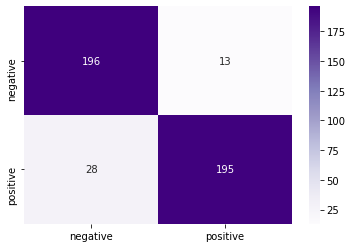

In [272]:
# sns.heatmap(cm,cmap='plasma',annot=True)
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [275]:
# Valid
import sklearn
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.9050925925925926

In [182]:
model.evaluate_generator(test_gen,verbose=1)

7/7 [==============================] - 29s 4s/step - loss: 0.8354 - output3_loss: 0.2688 - output1_loss: 0.2662 - output2_loss: 0.3004 - output3_accuracy: 0.9050 - output1_accuracy: 0.8975 - output2_accuracy: 0.8825


[0.8354020714759827,
 0.2687830626964569,
 0.26622477173805237,
 0.300394207239151,
 0.9049999713897705,
 0.8974999785423279,
 0.8824999928474426]

In [276]:
y=np.array(test_df['class'].tolist())

In [277]:
y_actual=[]
y_test=[]

In [278]:
for i in range(len(y)):
    if(y[i]=='negative'):
        y_actual.append(0)
    elif(y[i]=='positive'):
        y_actual.append(1)
    else:
        print('error')
        break

In [279]:
for j in range (len(test_df.filename)):
    img_path="Capstone covid data/test/"+test_df.filename.array[j]
    i = image.load_img(img_path, target_size=(224,224))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 224,224,3)
    p=model.predict(i)
    flag=0
    if(p[0][0]>=0.5):
        flag+=1
    if(p[1][0]>=0.5):
        flag+=1
    if(p[2][0]>=0.5):
        flag+=1
    
    if(flag>=2):
        y_test.append(1)
    elif(flag<2):
        y_test.append(0)
    

In [280]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [281]:
cm= confusion_matrix(y_actual,y_test)

<AxesSubplot:>

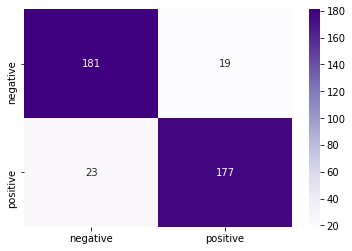

In [282]:
# sns.heatmap(cm,annot=True)
sns.heatmap(cm,annot=True, fmt="d",cmap="Purples", xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [283]:
# y_actual

In [284]:
# y_test

In [285]:
# test
sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)

0.895

In [287]:
# sklearn.metrics.accuracy_score(y_actual, y_test, normalize=True, sample_weight=None)